# Install Imgaug

In [1]:
# !pip install imgaug

# Import Modules 

In [2]:
import os
import cv2
import xml.etree.ElementTree as ET
from matplotlib import pyplot as plt
from imgaug import augmenters as iaa
import matplotlib.patches as patches
import imgaug as ia
from imgaug import augmenters as iaa


# Show Annotated Images

In [3]:
def display_annotation(image_path, annotation_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load the corresponding annotation file
    tree = ET.parse(annotation_path)
    root = tree.getroot()

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Iterate over the bounding boxes in the annotation
    for obj in root.findall('object'):
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        # Create a rectangle patch for each bounding box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')

        # Add the rectangle patch to the axes
        ax.add_patch(rect)

    # Display the image with bounding boxes
    plt.axis('off')
    plt.show()




Example 01

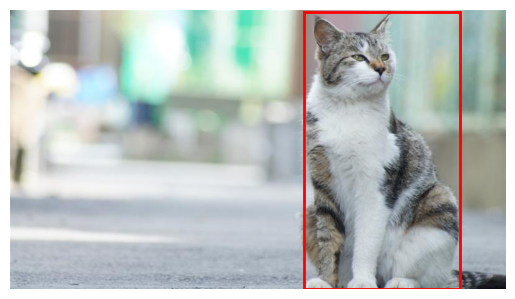

In [4]:
# Example 01
image_path = r"C:\Users\My Own\Desktop\Data Augmention\input data\cat.jpg"
annotation_path = r"C:\Users\My Own\Desktop\Data Augmention\input data\cat.xml"
display_annotation(image_path, annotation_path)

Example 02

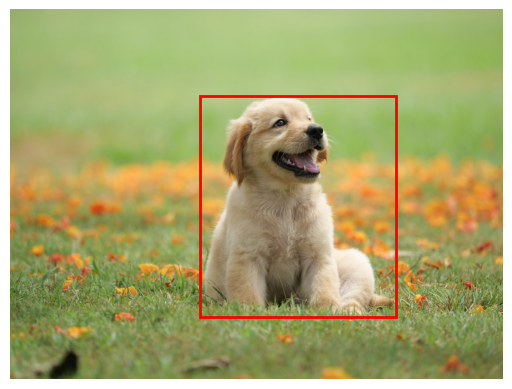

In [5]:
image_path = r"C:\Users\My Own\Desktop\Data Augmention\input data\dog.jpg"
annotation_path = r"C:\Users\My Own\Desktop\Data Augmention\input data\dog.xml"
display_annotation(image_path, annotation_path)

# Data Augmentation

In [6]:
def data_augment(dataset_dir,output_dir,number_of_aug):
    # Define the augmentation sequence
    augmentation = iaa.Sequential([
        iaa.Affine(rotate=(-10, 10)),  # Random rotation (-10 to 10 degrees)
        iaa.Fliplr(0.5)  # Random horizontal flipping (50% probability)
    ])
  
    # Iterate over the dataset
    for filename in os.listdir(dataset_dir):
        if filename.endswith(".jpg"):
            # Load the image
            image_path = os.path.join(dataset_dir, filename)
            image = cv2.imread(image_path)

            # Load the corresponding XML annotation
            annotation_filename = os.path.splitext(filename)[0] + ".xml"
            annotation_path = os.path.join(dataset_dir, annotation_filename)
            tree = ET.parse(annotation_path)
            root = tree.getroot()

            # Extract the bounding box coordinates from the XML annotation
            xmin = int(root.find(".//xmin").text)
            ymin = int(root.find(".//ymin").text)
            xmax = int(root.find(".//xmax").text)
            ymax = int(root.find(".//ymax").text)

            # Create a bounding box object
            bounding_box = ia.BoundingBox(x1=xmin, y1=ymin, x2=xmax, y2=ymax)
            for i in range(number_of_aug):
                # Apply augmentation to the image and bounding box
                augmented_image, augmented_bounding_box = augmentation(image=image, bounding_boxes=[bounding_box])

                # Update the XML annotation with the adjusted bounding box coordinates
                root.find(".//xmin").text = str(int(augmented_bounding_box[0].x1))
                root.find(".//ymin").text = str(int(augmented_bounding_box[0].y1))
                root.find(".//xmax").text = str(int(augmented_bounding_box[0].x2))
                root.find(".//ymax").text = str(int(augmented_bounding_box[0].y2))
                annotation_filename_aug=annotation_filename[:len(annotation_filename)-4]+"_aug"+str(i)+'.xml'
                filename_aug=filename[:len(filename)-4]+"_aug"+str(i)+'.jpg'
                # Save the augmented image
                output_image_path = os.path.join(output_dir, filename_aug)
                cv2.imwrite(output_image_path, augmented_image)

                # Save the updated XML annotation
                output_annotation_path = os.path.join(output_dir, annotation_filename_aug)
                tree.write(output_annotation_path)

    print("Augmented images and updated XML annotations saved successfully!")


In [7]:
# Define the path to your dataset directory
dataset_dir = r"C:\Users\My Own\Desktop\Data Augmention\input data"
# Define the path to the output directory where augmented images and updated XML annotations will be saved
output_dir = r"C:\Users\My Own\Desktop\Data Augmention\output data"

data_augment(dataset_dir,output_dir,10)

Augmented images and updated XML annotations saved successfully!


Example 01

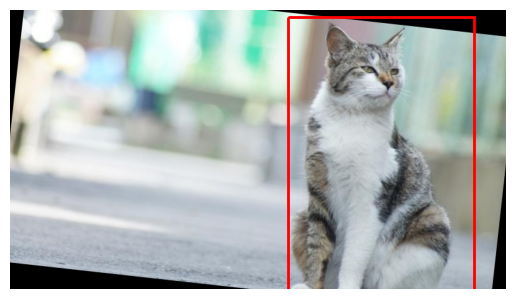

In [8]:
image_path = r"C:\Users\My Own\Desktop\Data Augmention\output data\cat_aug0.jpg"
annotation_path = r"C:\Users\My Own\Desktop\Data Augmention\output data\cat_aug0.xml"
display_annotation(image_path, annotation_path)

Example 02

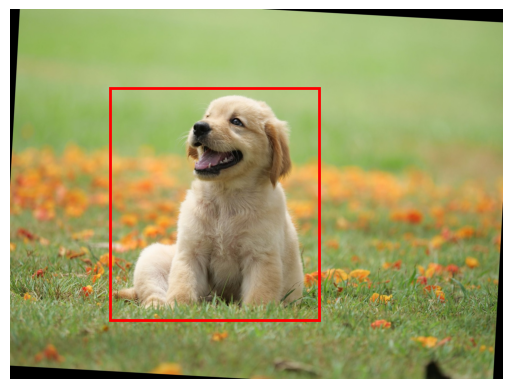

In [9]:
image_path = r"C:\Users\My Own\Desktop\Data Augmention\output data\dog_aug5.jpg"
annotation_path = r"C:\Users\My Own\Desktop\Data Augmention\output data\dog_aug5.xml"
display_annotation(image_path, annotation_path)